<b>Hier begint real-deal sprint 1 notebook:<b>

# Sprint 1: Data analysis and supervised learning

We start by importing our required libraries and loading our dataset into a pandas dataframe:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("data/complaints-2020-01-22_08_24.csv")
data.head(1)
# data.describe(include='all') #anders enkel numerieke waarden statistieken

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/23/19,"Credit reporting, credit repair services, or o...",Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,I have complained many times that the credit r...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,926XX,None,Consent provided,Web,07/23/19,Closed with explanation,Yes,NaN,3315279


From the dataset, we can extract the following columns with the type of data it contains:

In [2]:
data_features = data.dtypes
data_features

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

We start by transforming al the empty fields to the same value so we change all NaN of consumer disputed to None:

In [14]:
data["Consumer disputed?"].fillna("None")

0         None
1         None
2         None
3         None
4         None
          ... 
485696      No
485697      No
485698      No
485699      No
485700      No
Name: Consumer disputed?, Length: 485701, dtype: object

To make the processing faster, we change all categorical data to numerical values and add them to the dataframe:

In [23]:
data["num_Product"] = data["Product"].astype("category").cat.codes
data["num_Sub-product"] = data["Sub-product"].astype("category").cat.codes
data["num_Issue"] = data["Issue"].astype("category").cat.codes
data["num_Sub-issue"] = data["Sub-issue"].astype("category").cat.codes
data["num_Company"] = data["Company"].astype("category").cat.codes
data["num_State"] = data["State"].astype("category").cat.codes
data["num_Submitted via"] = data["Submitted via"].astype("category").cat.codes
data["num_Company response to consumer"] = data["Company response to consumer"].astype("category").cat.codes
data.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Consumer disputed?,Complaint ID,num_Product,num_Sub-product,num_Issue,num_Sub-issue,num_Company,num_State,num_Submitted via,num_Company response to consumer
0,07/23/19,"Credit reporting, credit repair services, or o...",Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,I have complained many times that the credit r...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,926XX,...,NaN,3315279,6,15,45,127,1488,8,0,1
1,07/26/19,Debt collection,I do not know,False statements or representation,Attempted to collect wrong amount,please review the current fraud account and al...,Company believes it acted appropriately as aut...,"Ideal Collection Services, Inc.",FL,333XX,...,NaN,3319487,7,33,56,9,2052,13,0,1


<b>Vanaf hier alles dat nog niet officieel in de notebook zit<b>

# Plots

This is the distribution of the categories of products.

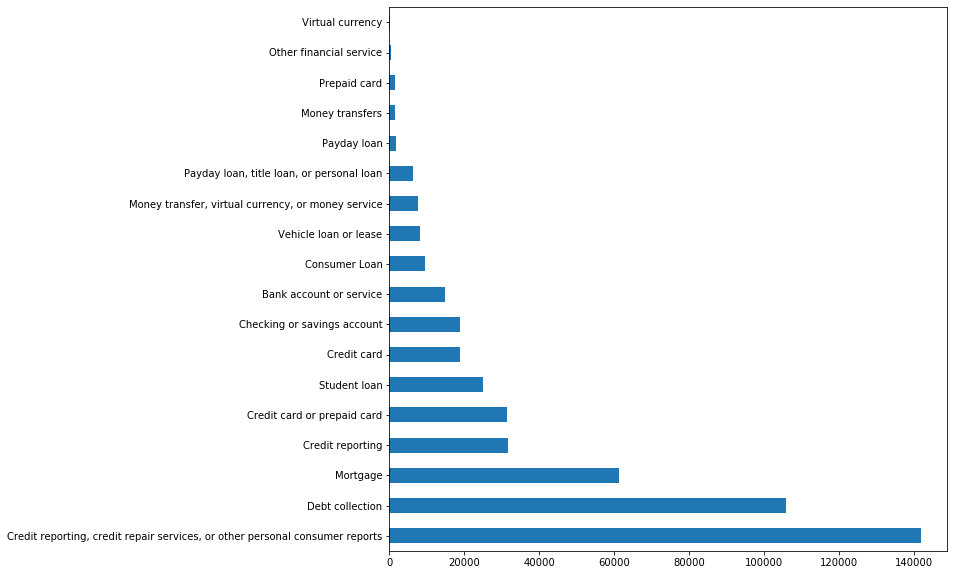

In [2]:
#duplicaten vinden
#data[data.duplicated()] #er zijn er geen over alle kolommen bekeken

#data[data.duplicated(["ZIP code","Product"])]

plt.figure(figsize=(10,10))
data["Product"].value_counts().plot(kind="barh")


Virtual currency en money transfers => money transfer,virtual...
payday loan => payday loan, title loan...
prepaid card en credit card => prepaid and credit
credit reporting => credit reporting, credit repair services...


# Unnecessary columns

In [67]:
print(data.info())
data.isnull().sum(axis=0) # over alle kolommen heen
#data=data.drop(columns=["Consumer disputed?"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485701 entries, 0 to 485700
Data columns (total 18 columns):
Date received                   485701 non-null object
Product                         485701 non-null object
Sub-product                     485701 non-null object
Issue                           485701 non-null object
Sub-issue                       485701 non-null object
Consumer complaint narrative    485701 non-null object
Company public response         485701 non-null object
Company                         485701 non-null object
State                           485701 non-null object
ZIP code                        485701 non-null object
Tags                            485701 non-null object
Consumer consent provided?      485701 non-null object
Submitted via                   485701 non-null object
Date sent to company            485701 non-null object
Company response to consumer    485701 non-null object
Timely response?                485701 non-null object
Consumer 

Date received                        0
Product                              0
Sub-product                          0
Issue                                0
Sub-issue                            0
Consumer complaint narrative         0
Company public response              0
Company                              0
State                                0
ZIP code                             0
Tags                                 0
Consumer consent provided?           0
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?              321634
Complaint ID                         0
dtype: int64

Eerste stap : date received,complaint id, consumer disputed?, timely response?, date sent to company, consumer consent, submitted via,state en zip code,tags, Company public response,Company response to consumer weg

We houden over: product,subproduct,issue,subissue,consumer complaint narrative,company

Volgende stap state en zip code, (tags?) meepakken

In [68]:
data["Company"].unique()

array(['Experian Information Solutions Inc.',
       'Ideal Collection Services, Inc.',
       'ONEMAIN FINANCIAL HOLDINGS, LLC.', ..., 'Homes By Hunt LLC',
       'Maxitransfers Corporation', 'Reliable Auto Finance, Inc.'],
      dtype=object)

# Text Processing

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
subdata = data[["Complaint ID","Consumer complaint narrative","Product","Issue"]][:5000]

count_vect = CountVectorizer(
    stop_words="english",
    ngram_range=(1,2),
    min_df=0.04,
    max_df=0.7
)

X_train_counts = count_vect.fit_transform(subdata["Consumer complaint narrative"])
feature_names=count_vect.get_feature_names()

In [18]:
tf_transformer = TfidfTransformer()
X_train_tf = tf_transformer.fit_transform(X_train_counts)

In [19]:
index=60
print(subdata.at[index, "Consumer complaint narrative"])
print(subdata.at[index, "Product"])
print(subdata.at[index, "Issue"])



features = X_train_tf[index]

terms = pd.DataFrame(features.T.todense(), index=feature_names, columns=["tfidf"])
terms.sort_values(by=["tfidf"],ascending=False).head(n=10)

EXPERIAN AND XXXX XXXX XXXX XXXX ARE WRONGFULLY PUTTING FORTH INFORMATION THAT APPEARS HONEST AND CORRECT ON ITS FACE YET, WHEN THE RESULTS OF INVESTIGATION AND FACTS IN THE COMMON PURVIEW ARE REVEALED ... EXPERIAN AND XXXX XXXX XXXX HAVE A LEGAL PROBLEM WITH THEIR ATTITUDE AND INSISTENCE ON A LACK OF FORBEARANCE TO STATE SOFTLY AND MAY BE CONTRARY TO XXXX XXXX CHECK CLEARING LAWS, THE FCRA AND THE FDCPA.HERE AND BELOW I STATE MY SIMPLE CASE THAT I WOULD BE HAPPY TO BE HEARD BY A SMALL CLAIMS MAGISTRATE AND THE XXXX XXXX XXXX WHICH EXPERIAN AND OR XXXX XXXX WOULD LIKELY APPEAL TO ... ... ..SHOULD I DECIDE TO SPEND {$60.00} TO TAKE THIS CFPB CASE TO COURT. 
XXXX XXXX XXXX XXXX. ACCOUNT NO XXXX .... HAS DESTROYED MY CREDIT FOR 5 YEARS BECAUSE XXXX XXXX CLAIMS THEY WERE NOT PAID {$250.00} THE FINAL PARTIAL PAYMENT ON A CAR LOAN ... XXXX XXXX 'S PRESIDENT 'S OFFICE HAS RESPONDED TO EARLIER CFPB COMPLAINT STATING THAT MY FINAL CHECK BOUNCED AND THAT THAT CHECK TOOK 47 DAYS TO BOUNCE OR BE C

,tfidf
xxxx xxxx,0.510386
cfpb,0.462804
check,0.350830
experian,0.267908
claims,0.209606
years,0.159840
loan,0.140736
car,0.139255
days,0.138225
court,0.132751


# K-nearest Neighbors